In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지 (이것만 유지)
sns.set_style('whitegrid') 

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.shape, test.shape

((6818, 12), (1705, 11))

In [2]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR06,12.500,Low Fat,0.006760,Household,42.8112,OUT013,1987,High,Tier 3,Supermarket Type1,639.1680
1,FDW11,12.600,Low Fat,0.048741,Breads,60.4194,OUT013,1987,High,Tier 3,Supermarket Type1,990.7104
2,FDH32,12.800,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,1987,High,Tier 3,Supermarket Type1,2799.6890
3,FDL52,6.635,Regular,0.046351,Frozen Foods,37.4506,OUT017,2007,NaN,Tier 2,Supermarket Type1,1176.4686
4,FDO09,13.500,Regular,0.125170,Snack Foods,261.4910,OUT013,1987,High,Tier 3,Supermarket Type1,3418.8830


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,5656.0,12.872703,4.651034,4.555,8.785000,12.600000,17.000000,21.350000
Item_Visibility,6818.0,0.066121,0.051383,0.000,0.026914,0.053799,0.095273,0.328391
Item_MRP,6818.0,140.419533,62.067861,31.290,93.610050,142.448300,185.060150,266.888400
Outlet_Establishment_Year,6818.0,1997.885890,8.339795,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,6818.0,2190.941459,1706.131256,33.290,836.577700,1806.648300,3115.944000,13086.964800


In [5]:
train.describe(include='O').T

,count,unique,top,freq
Item_Identifier,6818,1554,FDW26,9
Item_Fat_Content,6818,5,Low Fat,4092
Item_Type,6818,16,Snack Foods,963
Outlet_Identifier,6818,10,OUT046,763
Outlet_Size,4878,3,Medium,2228
Outlet_Location_Type,6818,3,Tier 3,2664
Outlet_Type,6818,4,Supermarket Type1,4474


In [6]:
test.describe(include='O').T

,count,unique,top,freq
Item_Identifier,1705,1077,FDG33,4
Item_Fat_Content,1705,5,Low Fat,997
Item_Type,1705,16,Fruits and Vegetables,272
Outlet_Identifier,1705,10,OUT013,207
Outlet_Size,1235,3,Medium,565
Outlet_Location_Type,1705,3,Tier 3,686
Outlet_Type,1705,4,Supermarket Type1,1103


In [7]:
#Item_Type 컬럼의 최빈값(Top)과 빈도(Freq) 확인
train['Item_Type'].mode()[0], train['Item_Type'].value_counts().max()

('Snack Foods', 963)

In [8]:
missing_count = train.isnull().sum()
missing_cols = missing_count[missing_count > 0].sort_values(ascending=False)
missing_cols

Outlet_Size    1940
Item_Weight    1162
dtype: int64

In [9]:
# 결측치 처리 (회귀분석을 위해 해당 행을 임시로 제거, 실제로는 대체를 권장)
df_model = train.dropna(subset=['Item_Outlet_Sales', 'Item_Type']) 

# OLS 모델 적합: C(Item_Type)을 통해 범주형 변수를 더미 변수로 자동 변환
formula = 'Item_Outlet_Sales ~ C(Item_Type)'
model = ols(formula, data=df_model).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.913
Date:                Fri, 07 Nov 2025   Prob (F-statistic):             0.0178
Time:                        06:23:59   Log-Likelihood:                -60399.
No. Observations:                6818   AIC:                         1.208e+05
Df Residuals:                    6802   BIC:                         1.209e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

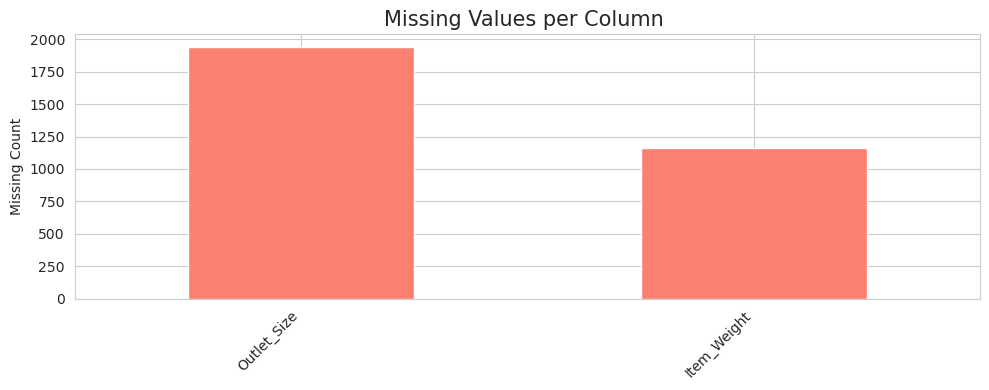

In [10]:
# 결측치 시각화
if not missing_cols.empty:
    plt.figure(figsize=(10, 4))
    missing_cols.plot(kind='bar', color='salmon')
    plt.title('Missing Values per Column ', fontsize=15)
    plt.ylabel('Missing Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found, visualization skipped.")

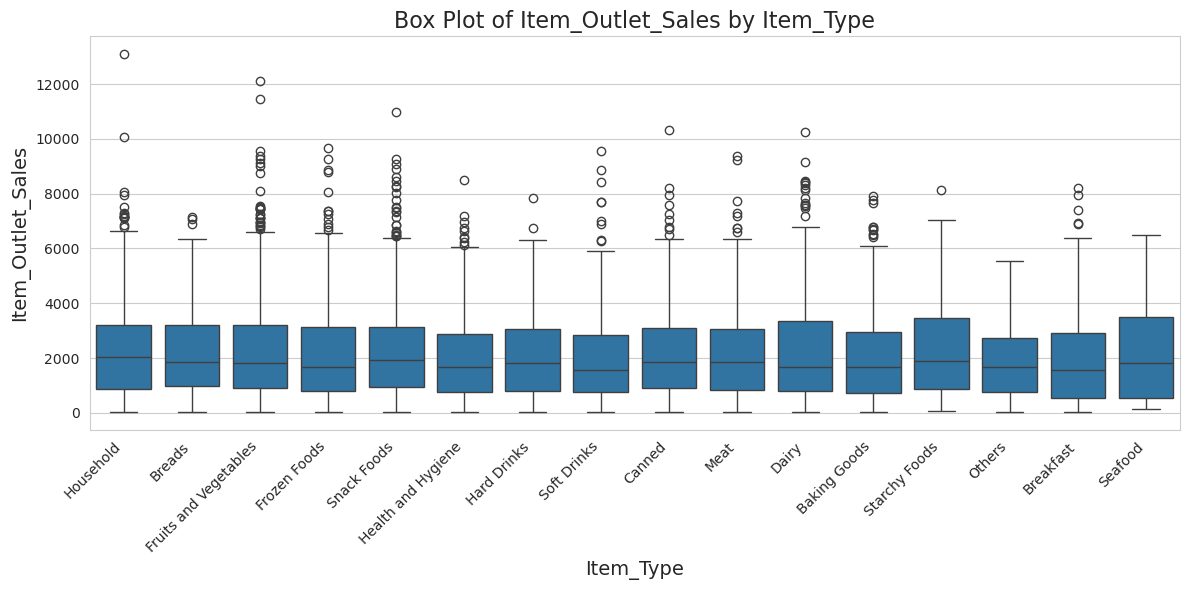

In [11]:
# 범주형 변수와 수치형 변수 관계 시각화
plt.figure(figsize=(12, 6))
# Item_Type 별 Item_Outlet_Sales 상자 그림
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.title('Box Plot of Item_Outlet_Sales by Item_Type', fontsize=16)
plt.xlabel('Item_Type', fontsize=14)
plt.ylabel('Item_Outlet_Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# [인사이트]
# 1. Item_Visibility가 0인 값들이 있습니다. 
#    - 판매되는 상품의 가시성이 0일 순 없으므로, 이는 '결측치'로 간주하고 처리해야 합니다.
# 2. Item_Fat_Content에 'low fat', 'LF', 'Low Fat' 등 동일한 의미의 다른 표기값이 존재합니다.
#    - 값을 통일해야 합니다.
# 3. Outlet_Establishment_Year는 연도 자체보다 '매장의 나이(Outlet_Age)'가 판매량에 더 큰 영향을 미칠 것입니다.
#    - 'Outlet_Age' 파생 변수를 생성합니다. (5번 성능 개선안)
# 4. Item_MRP(가격)는 판매량(Item_Outlet_Sales)과 강한 양의 상관관계를 가질 것으로 예상됩니다.
#    - 상관관계 분석으로 확인합니다.
# 5. Item_Weight와 Outlet_Size에 결측치가 있습니다.
#    - 'Item_Weight'는 동일 상품(Item_Identifier)의 평균값으로, 
#    - 'Outlet_Size'는 매장 유형(Outlet_Type)별 최빈값으로 대체하는 것이 합리적입니다.

In [12]:
# --- [전처리 시작] ---
# 1-1. Item_Fat_Content 값 통일
datasets = [train, test]
for df in datasets:
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

In [13]:
# 1-2. Item_Visibility의 0값을 np.nan으로 변경 (이후 평균값으로 대체)
for df in datasets:
    df['Item_Visibility'] = df['Item_Visibility'].replace(0, np.nan)

In [14]:
# 1-3. 파생 변수 생성: Outlet_Age (성능 개선안에 사용)
# (데이터 수집 시점이 2013년으로 보임)
latest_year = 2013 
for df in datasets:
    df['Outlet_Age'] = latest_year - df['Outlet_Establishment_Year']

In [15]:
# 1-4. 결측치 채우기
# (주의: test의 결측치는 train의 통계값으로 채워야 함)

# Item_Weight: 상품(Item_Identifier)별 평균 무게로 채우기
item_avg_weight = train.groupby('Item_Identifier')['Item_Weight'].transform('mean')
train['Item_Weight'] = train['Item_Weight'].fillna(item_avg_weight)
test['Item_Weight'] = test['Item_Weight'].fillna(item_avg_weight)
# 그래도 남는 결측치는 전체 평균으로 (test에만 있는 신상품 대비)
train_global_avg_weight = train['Item_Weight'].mean()
train['Item_Weight'] = train['Item_Weight'].fillna(train_global_avg_weight)
test['Item_Weight'] = test['Item_Weight'].fillna(train_global_avg_weight)

# Outlet_Size: 매장 유형(Outlet_Type)별 최빈값으로 채우기
outlet_size_mode = train.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0])
train['Outlet_Size'] = train.apply(
    lambda row: outlet_size_mode[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'],
    axis=1
)
test['Outlet_Size'] = test.apply(
    lambda row: outlet_size_mode[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'],
    axis=1
)

# Item_Visibility: 상품(Item_Identifier)별 평균 가시성으로 채우기
item_avg_visibility = train.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
train['Item_Visibility'] = train['Item_Visibility'].fillna(item_avg_visibility)
test['Item_Visibility'] = test['Item_Visibility'].fillna(item_avg_visibility)
# 그래도 남는 결측치는 전체 평균으로
train_global_avg_visibility = train['Item_Visibility'].mean()
train['Item_Visibility'] = train['Item_Visibility'].fillna(train_global_avg_visibility)
test['Item_Visibility'] = test['Item_Visibility'].fillna(train_global_avg_visibility)

print("\n--- 전처리 완료 ---")
print(f"Train 결측치 개수: {train.isnull().sum().sum()}")
print(f"Test 결측치 개수: {test.isnull().sum().sum()}\n")


--- 전처리 완료 ---
Train 결측치 개수: 0
Test 결측치 개수: 0



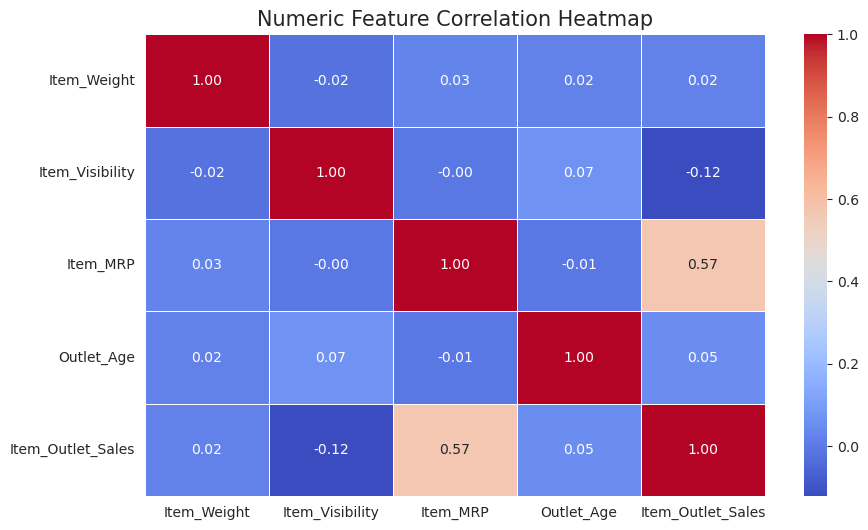

-> [인사이트] Item_MRP(가격)가 Sales와 0.57로 가장 강한 양의 상관관계를 보입니다.



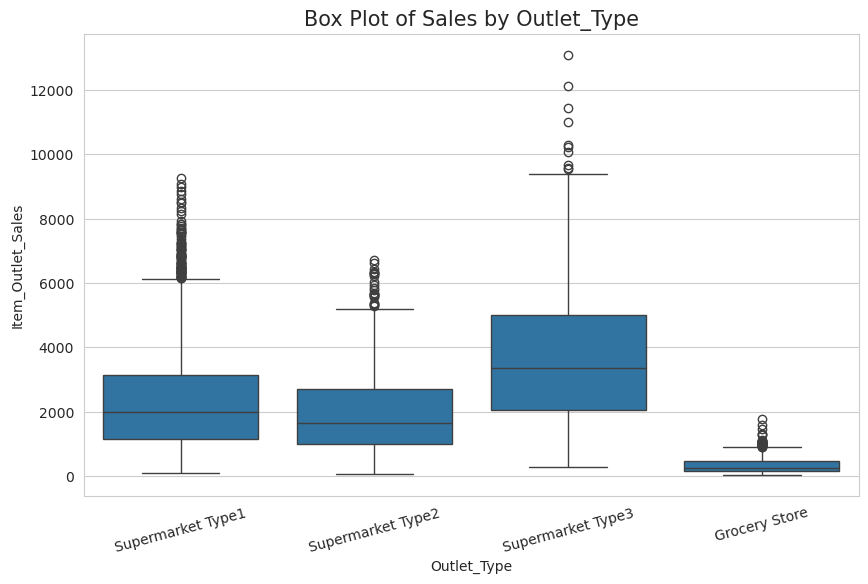

-> [인사이트] Outlet_Type별 판매량 차이가 큽니다. 특히 'Supermarket Type3'가 월등히 높습니다.



In [16]:
# --- [EDA] ---

# 수치형 변수 간 상관관계 확인
plt.figure(figsize=(10, 6))
corr_matrix = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Item_Outlet_Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Numeric Feature Correlation Heatmap', fontsize=15)
plt.show()
print("-> [인사이트] Item_MRP(가격)가 Sales와 0.57로 가장 강한 양의 상관관계를 보입니다.\n")

# 범주형 변수(Outlet_Type)와 Sales 관계 확인
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)
plt.title('Box Plot of Sales by Outlet_Type', fontsize=15)
plt.xticks(rotation=15)
plt.show()
print("-> [인사이트] Outlet_Type별 판매량 차이가 큽니다. 특히 'Supermarket Type3'가 월등히 높습니다.\n")

In [18]:
# --- 4) 성능지표(MSE, RMSE, MAE, R2)의 결과를 출력합니다. (헬퍼 함수 정의) ---
# (평가를 위해 함수를 미리 정의)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# --- 라이브러리 추가 임포트 (모델링용) ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def print_metrics(y_true, y_pred, model_name="Model"):
    """
    회귀 모델의 4가지 성능 지표(MSE, RMSE, MAE, R2)를 출력하는 함수
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} 성능 평가 ---")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 (설명력): {r2:.4f}")
    print("----------------------------------\n")
    # 5번 문제(비교)를 위해 딕셔너리로 반환
    return {'Model': model_name, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

In [19]:
# ==========================================================
#               "기존안" (Baseline Model)
# ==========================================================
print("======= '기존안' (Baseline) 모델링 시작 =======\n")

# --- 2) 학습 데이터를 train / val (8:2) 로 나누어 val은 이후 검증에 사용합니다. ---

# "기존안" 피처 정의: 파생변수(Outlet_Age) 제외, 불필요한 ID 및 원본 컬럼 제외
target_col = 'Item_Outlet_Sales'
base_features = [col for col in train.columns if col not in [
    target_col, 'Item_Identifier', 'Outlet_Identifier', 
    'Outlet_Establishment_Year', 'Outlet_Age' # 파생변수 및 원본 제외
]]

X_base = train[base_features]
y = train[target_col]

# 2) 데이터 분할
X_train_base, X_val_base, y_train, y_val = train_test_split(
    X_base, y, test_size=0.2, random_state=42
)
print(f"2) [Baseline] 데이터 분할 완료: Train {X_train_base.shape}, Val {X_val_base.shape}\n")


# --- 3) 선형 회귀 모델 중 하나를 선택하여 교차검증이후 데이터셋을 학습 시킵니다 ---

# 전처리 파이프라인 구축 (스케일링 및 인코딩)
# 수치형/범주형 변수 리스트 자동 선택
numeric_features_base = X_train_base.select_dtypes(include=['int64', 'float64']).columns
categorical_features_base = X_train_base.select_dtypes(include=['object']).columns

# 수치형: 스케일링 / 범주형: 원-핫 인코딩
preprocessor_base = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_base),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_base)
    ],
    remainder='passthrough'
)

# 파이프라인 생성: Linear Regression
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_base),
    ('model', LinearRegression()) # 3) 모델 선택
])

# 3) 교차 검증 (K-Fold, K=5)
print("3) [Baseline] 교차검증(CV) 시작...")
cv_scores_base = cross_val_score(baseline_pipeline, X_train_base, y_train, 
                                 cv=5, scoring='r2') # K-Fold (K=5)
print(f"[Baseline] 5-Fold CV R2 (평균): {np.mean(cv_scores_base):.4f}\n")

# 3) 모델 학습
baseline_pipeline.fit(X_train_base, y_train)
print("3) [Baseline] 모델 학습 완료.\n")

# --- 4) 성능지표(MSE, RMSE, MAE, R2)의 결과를 출력합니다. (Baseline) ---
y_pred_base = baseline_pipeline.predict(X_val_base)
baseline_metrics = print_metrics(y_val, y_pred_base, "Baseline (Linear Regression)")

======= '기존안' (Baseline) 모델링 시작 =======

2) [Baseline] 데이터 분할 완료: Train (5454, 8), Val (1364, 8)

3) [Baseline] 교차검증(CV) 시작...
[Baseline] 5-Fold CV R2 (평균): 0.5558

3) [Baseline] 모델 학습 완료.

--- Baseline (Linear Regression) 성능 평가 ---
MSE: 1274123.7046
RMSE: 1128.7709
MAE: 826.7627
R2 (설명력): 0.5734
----------------------------------



In [20]:
# ==========================================================
#       5) "개선안" (Improved Model) 및 비교
# ==========================================================
# - 성능개선방안 1: 파생변수 생성 (Outlet_Age)
# - 성능개선방안 2: 모델 변경 (LinearRegression -> RandomForest)
# ----------------------------------------------------------

print("======= 5) '개선안' (Improved) 모델링 시작 =======\n")

# --- [개선안] 2) 데이터 분할 ---
# "개선안" 피처 정의: 파생변수(Outlet_Age) 포함
improved_features = [col for col in train.columns if col not in [
    target_col, 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year' # 원본 연도 제외
]]

X_improved = train[improved_features]
# y는 동일함

# 2) 데이터 분할 (동일한 random_state로 분할)
X_train_imp, X_val_imp, y_train_imp, y_val_imp = train_test_split(
    X_improved, y, test_size=0.2, random_state=42
)
print(f"2) [Improved] 데이터 분할 완료: Train {X_train_imp.shape}, Val {X_val_imp.shape}\n")

# --- [개선안] 3) 학습 (RandomForest) ---

# 전처리 파이프라인 구축 (Outlet_Age 포함됨)
numeric_features_imp = X_train_imp.select_dtypes(include=['int64', 'float64']).columns
categorical_features_imp = X_train_imp.select_dtypes(include=['object']).columns

# (참고: 트리 모델은 스케일링이 필수는 아니나, 파이프라인 일관성을 위해 적용)
preprocessor_imp = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_imp),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_imp)
    ],
    remainder='passthrough'
)

# 5) 모델 변경: RandomForestRegressor 사용
improved_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_imp),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)) 
])

# 3) 교차 검증 (K-Fold)
print("3) [Improved] 교차검증(CV) 시작...")
cv_scores_imp = cross_val_score(improved_pipeline, X_train_imp, y_train_imp, 
                                cv=5, scoring='r2')
print(f"[Improved] 5-Fold CV R2 (평균): {np.mean(cv_scores_imp):.4f}\n")

# 3) 모델 학습
improved_pipeline.fit(X_train_imp, y_train_imp)
print("3) [Improved] 모델 학습 완료.\n")

# --- [개선안] 4) 성능지표 확인 ---
y_pred_imp = improved_pipeline.predict(X_val_imp)
improved_metrics = print_metrics(y_val_imp, y_pred_imp, "Improved (RF + Outlet_Age)")

# --- [최종] 5) 기존안과 개선된 안을 모두 제출합니다 (성능평가지표로 비교) ---
print("======= 5) 최종 성능 비교 (R2 기준) =======\n")

# 두 모델의 평가지표를 DataFrame으로 합치기
results_df = pd.DataFrame([baseline_metrics, improved_metrics])
results_df = results_df.set_index('Model')

print(results_df)

# R2 점수 비교
r2_base = baseline_metrics['R2']
r2_imp = improved_metrics['R2']
improvement = ((r2_imp - r2_base) / r2_base) * 100

print(f"\n[성능 개선 요약]")
print(f" - 기존안 (Linear Regression) R2: {r2_base:.4f}")
print(f" - 개선안 (RandomForest + Outlet_Age) R2: {r2_imp:.4f}")
print(f" - R2 성능 향상률: {improvement:.2f}%")
print("\n[개선 방안 채택]")
print("1. 모델 변경: LinearRegression -> RandomForest (비선형 관계 포착)")
print("2. 파생 변수 생성: 'Outlet_Age' 추가 (연도보다 나이가 비즈니스적으로 더 유의미)")
print("3. 전처리: Item_Visibility의 0값 및 기타 결측치를 논리적인 통계치로 대체")

======= 5) '개선안' (Improved) 모델링 시작 =======

2) [Improved] 데이터 분할 완료: Train (5454, 9), Val (1364, 9)

3) [Improved] 교차검증(CV) 시작...
[Improved] 5-Fold CV R2 (평균): 0.5792

3) [Improved] 모델 학습 완료.

--- Improved (RF + Outlet_Age) 성능 평가 ---
MSE: 1150536.6580
RMSE: 1072.6307
MAE: 746.1179
R2 (설명력): 0.6147
----------------------------------

======= 5) 최종 성능 비교 (R2 기준) =======

                                       MSE         RMSE         MAE        R2
Model                                                                        
Baseline (Linear Regression)  1.274124e+06  1128.770882  826.762721  0.573366
Improved (RF + Outlet_Age)    1.150537e+06  1072.630718  746.117900  0.614748

[성능 개선 요약]
 - 기존안 (Linear Regression) R2: 0.5734
 - 개선안 (RandomForest + Outlet_Age) R2: 0.6147
 - R2 성능 향상률: 7.22%

[개선 방안 채택]
1. 모델 변경: LinearRegression -> RandomForest (비선형 관계 포착)
2. 파생 변수 생성: 'Outlet_Age' 추가 (연도보다 나이가 비즈니스적으로 더 유의미)
3. 전처리: Item_Visibility의 0값 및 기타 결측치를 논리적인 통계치로 대체
